## Step 1

In [73]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [74]:
import pandas as pd
import seaborn as sns

In [75]:
data=pd.read_csv('data.csv')
data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [76]:
data.isna().sum()

x1    5
x2    3
y     0
dtype: int64

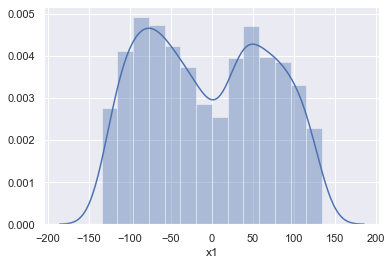

In [77]:
sns.distplot(data['x1'],kde=True)

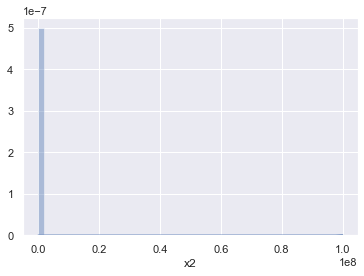

In [78]:
sns.distplot(data['x2'],kde=True)

In [79]:
data['x1'].mean()

-4.818766123605403

In [80]:
data['x1'].median()

-9.836555486

In [81]:
data['x1'].mode()

0   -118.366669
dtype: float64

In [82]:
data['x2'].mean()

89476.25894136279

In [83]:
data['x2'].median()

-1.04615092

In [84]:
data['x2'].mode()

0   -113.0
1    -55.0
dtype: float64

In [85]:
data.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [86]:
data['x1']=data['x1'].fillna(data['x1'].mode()[0])
data['x2']=data['x2'].fillna(data['x2'].mode()[1])

In [87]:
data.isna().sum()

x1    0
x2    0
y     0
dtype: int64

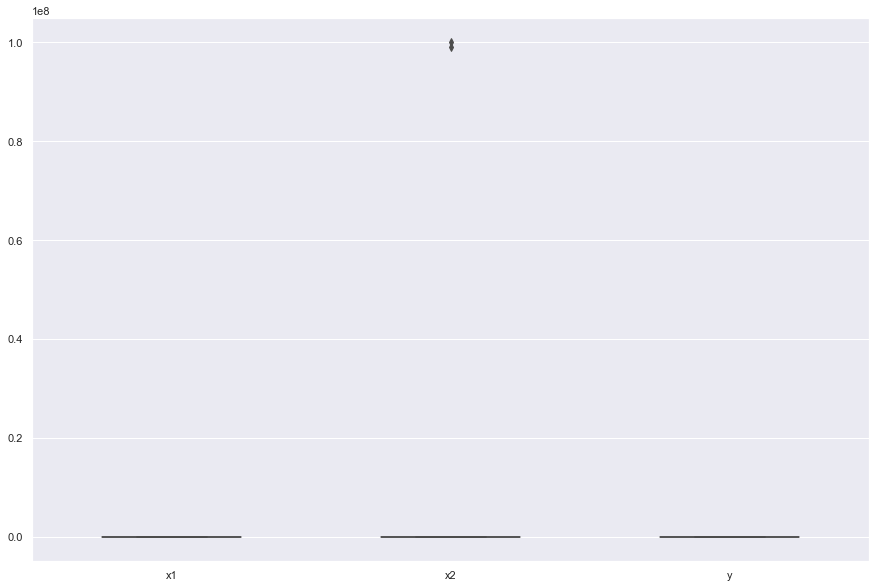

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=5)

In [71]:
q = data['x2'].quantile(0.10)
data_cleaned = data[data['x2']<q]

# Step 2: Building Model

## Logistic Regression

In [183]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [89]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [90]:
X=data.drop(columns=['y'])
y=data['y']

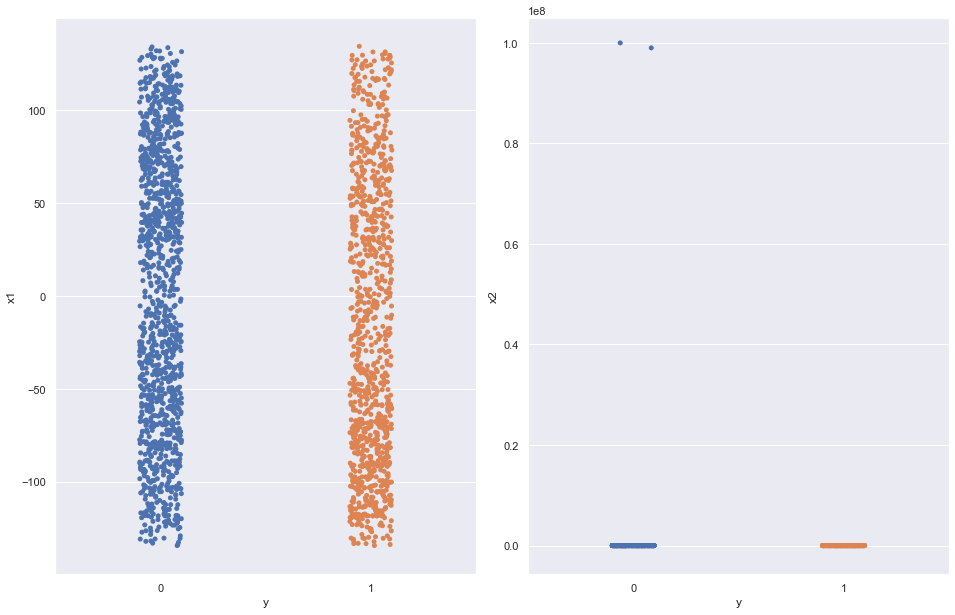

In [91]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [92]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [94]:
X_scaled

array([[-1.52326436e+00, -2.99400579e-02],
       [-1.27991858e+00, -2.99458361e-02],
       [-1.66869627e+00, -2.99428198e-02],
       ...,
       [ 1.20945890e+00, -2.99438023e-02],
       [ 1.11996224e+00, -2.99522682e-02],
       [ 1.52865864e+00,  3.35198187e+01]])

In [93]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.001392,x1
1,1.001392,x2


All the VIF values are less than 5 and are very low. That means no multicollinearity.

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [96]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = log_reg.predict(x_test)

In [99]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5673249551166966

In [100]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[244,  61],
       [180,  72]], dtype=int64)

In [101]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [102]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.5673249551166966

In [103]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8

In [104]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.5754716981132075

In [105]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6694101508916324

## Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [157]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
print(feature_name)
print(class_name)

['x1', 'x2']
[0, 1]


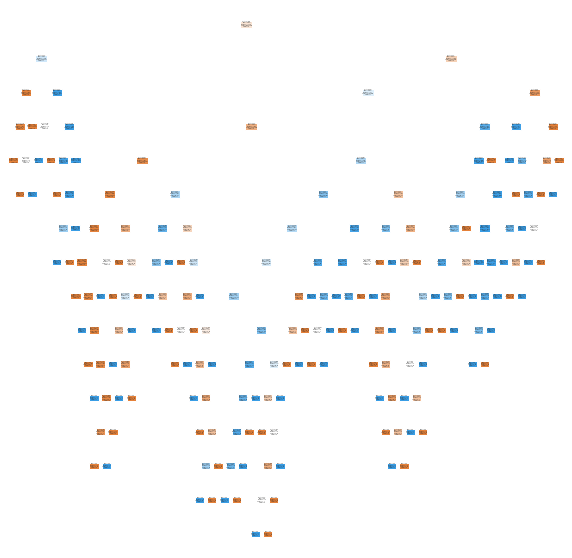

In [133]:
plt.figure(figsize=(10,10))
fig=tree.plot_tree(dt,
                   feature_names=['x1', 'x2'],
                   class_names=['0', '1'],
                   filled=True)

In [159]:
dt.score(x_train,y_train)

1.0

In [160]:
py_pred = dt.predict(x_test)
py_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [161]:
dt.score(x_test,y_test)

0.9245960502692998

## Hyperparameter tuning(step 3)

In [162]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [164]:
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [165]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [166]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'random'}


In [167]:
grid_search.best_score_

0.9526946107784431

In [168]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [169]:
clf.score(x_test,y_test)

0.940754039497307

## K-Nearest Neighbours

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

In [144]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [145]:
y_pred = knn.predict(x_test)

In [146]:
knn.score(x_train,y_train)

0.7245508982035929

In [147]:
knn.score(x_test,y_test)

0.49371633752244165

## Hyperparameter tuning

In [148]:
#Let's try to increase the accuracy by using hyperparameter tuning.
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [149]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [151]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.566, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.566, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.521, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.548, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.578, total= 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.602, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.617, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.572, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.563, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.581, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   38.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [152]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [153]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [154]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [155]:
knn.score(x_train,y_train)

0.6790419161676646

In [156]:
knn.score(x_test,y_test)

0.5224416517055656

## SVM

In [171]:
from  sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.33, random_state=42)

In [172]:
from sklearn.svm import SVC
model=SVC()
model.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [173]:
model.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(test_y,model.predict(test_x))

0.5401360544217687

## Implementing Grid Search

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [178]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [179]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   28.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [180]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001}

In [181]:
model_new=SVC(C=10, gamma=1)
model_new.fit(train_x,train_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [182]:
accuracy_score(test_y,model_new.predict(test_x))

0.638095238095238

## Step 4

In decision tree we can clearly the accuracy before hyperparameter tuning was 92% for test data, but after doing of hyperparameter tuning my test data accuracy has increased and became 94% and this accuracy is very close to my training accuracy which is 95% after hyperparameter tuning.

In KNN we got training accuracy as 72% and testing accuracy as 49% and after hyperparameter tuning my training accuracy got decreased to 67% and test accuracy got incresed to 52%. We can clealy se that our testing accuracy have increased after hyperparameter tuning and where training accuracy was high it got decreased.

In SVM accuracy obtained before Grid search was 54% only but after implementing grid search my accuracy has increased to 63% which a very good increase if compared to 54%

In logistic regression if we just go with accuracy it is 56%, but if we see for recall it is 57% and our precision is 80% and F1 score is 66%. By using precision we can distinguish between positive and negative value.here recall is also not high which says about how many true event we are able to recall out of all the true event.

I feel here we need to go with decision tree as it is giving very good accuray for our testing data and it =s accuracy is near to our training data accuracy. so our model is not overfitted.